In [177]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.coordinates import Angle
from astropy.nddata import Cutout2D
import numpy as np
from astropy.coordinates import SkyCoord


# RA = np.genfromtxt('/Users/agnivaghosh/Downloads/Lensing/BUFFALO/Abell370/RA.dat')
# dec = np.genfromtxt('/Users/agnivaghosh/Downloads/Lensing/BUFFALO/Abell370/dec.dat')

from matplotlib.patches import Rectangle, Ellipse
from matplotlib.offsetbox import (
    AnchoredOffsetbox, AuxTransformBox, DrawingArea, TextArea, VPacker)

class AnchoredSizeBar(AnchoredOffsetbox):
    def __init__(self, transform, size, label, loc,
                 pad=0.1, borderpad=0.1, sep=2, prop=None, frameon=True):
        """
        Draw a horizontal bar with the size in data coordinate of the given
        axes. A label will be drawn underneath (center-aligned).

        pad, borderpad in fraction of the legend font size (or prop)
        sep in points.
        """
        self.size_bar = AuxTransformBox(transform)
        self.size_bar.add_artist(Rectangle((0, 0), size, 0, ec="black", lw=1.0))

        self.txt_label = TextArea(label, minimumdescent=False)

        self._box = VPacker(children=[self.size_bar, self.txt_label],
                            align="center",
                            pad=0, sep=sep)

        super().__init__(loc, pad=pad, borderpad=borderpad,
                         child=self._box, prop=prop, frameon=frameon)

def draw_sizebar(ax):
    """
    Draw a horizontal bar with length of 0.1 in data coordinates,
    with a fixed label underneath.
    """
    from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
    asb = AnchoredSizeBar(ax.transData,
                          970,
                          r"300 kpc",
                          loc=4,
                          pad=0.1, borderpad=0.5, sep=5,color='black',
                          frameon=False)
    ax.add_artist(asb)


def plot(filename1,filename,p,noc):
    hdu1 = fits.open(filename1)[0]
    hdu = fits.open(filename)[0]

    wcs = WCS(hdu.header)
    fig, ax = plt.subplots(figsize=(20,20))

    ax = plt.subplot(projection=wcs)

    lon = ax.coords[0]
    lat = ax.coords[1]

    lon.set_axislabel('Right Ascension')
    lat.set_axislabel('Declination')
    ax.set_aspect('equal')


    plt.imshow(hdu.data, origin='lower',vmax=0.5,vmin=-0.01,cmap='binary')
    im=plt.contour(hdu1.data, noc, colors='red',transform=ax.get_transform(WCS(hdu1.header)),linewidths=1)
    plt.contour(hdu1.data, [1], colors='blue',transform=ax.get_transform(WCS(hdu1.header)),linewidths=2)
    draw_sizebar(ax)
#     ax.clabel(im, inline=1, fontsize=10)
    ax.set_title(p)
    plt.show()
    
def denseplot(filename1,filename,p,v):
    hdu1 = fits.open(filename1)[0]
    hdu = fits.open(filename)[0]

    wcs = WCS(hdu.header)
    fig, ax = plt.subplots(figsize=(20,20))

    ax = plt.subplot(projection=wcs)

    lon = ax.coords[0]
    lat = ax.coords[1]

    lon.set_axislabel('Right Ascension')
    lat.set_axislabel('Declination')
    ax.set_aspect('equal')


    plt.imshow(hdu1.data, origin='lower',vmax=v,vmin=-0.01,cmap='binary')
#     im=plt.contour(hdu1.data, noc, colors='red',transform=ax.get_transform(WCS(hdu1.header)),linewidths=1)
#     plt.contour(hdu1.data, [1], colors='blue',transform=ax.get_transform(WCS(hdu1.header)),linewidths=2)
    draw_sizebar(ax)
#     ax.clabel(im, inline=1, fontsize=10)
    ax.set_title(p)
    plt.show()

    
def logplot(filename1,filename,p,noc):
    hdu1 = fits.open(filename1)[0]
    hdu = fits.open(filename)[0]

    wcs = WCS(hdu.header)
    fig, ax = plt.subplots(figsize=(20,20))

    ax = plt.subplot(projection=wcs)

    lon = ax.coords[0]
    lat = ax.coords[1]

    lon.set_axislabel('Right Ascension')
    lat.set_axislabel('Declination')
    ax.set_aspect('equal')


    plt.imshow(hdu.data, origin='lower',vmax=0.5,vmin=-0.01,cmap='binary')
    im=plt.contour(np.log10(hdu1.data), noc, colors='red',transform=ax.get_transform(WCS(hdu1.header)),linewidths=1)
    plt.contour(np.log10(hdu1.data), [0], colors='blue',transform=ax.get_transform(WCS(hdu1.header)),linewidths=1)
    draw_sizebar(ax)
#     ax.clabel(im, inline=1, fontsize=10)
    ax.set_title(p)
    plt.show()
    


    
    
filename = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_hst_wfc3-60mas_abell370_f160w_v1.0-epoch2_drz.fits')


# Diego/WSLAP+

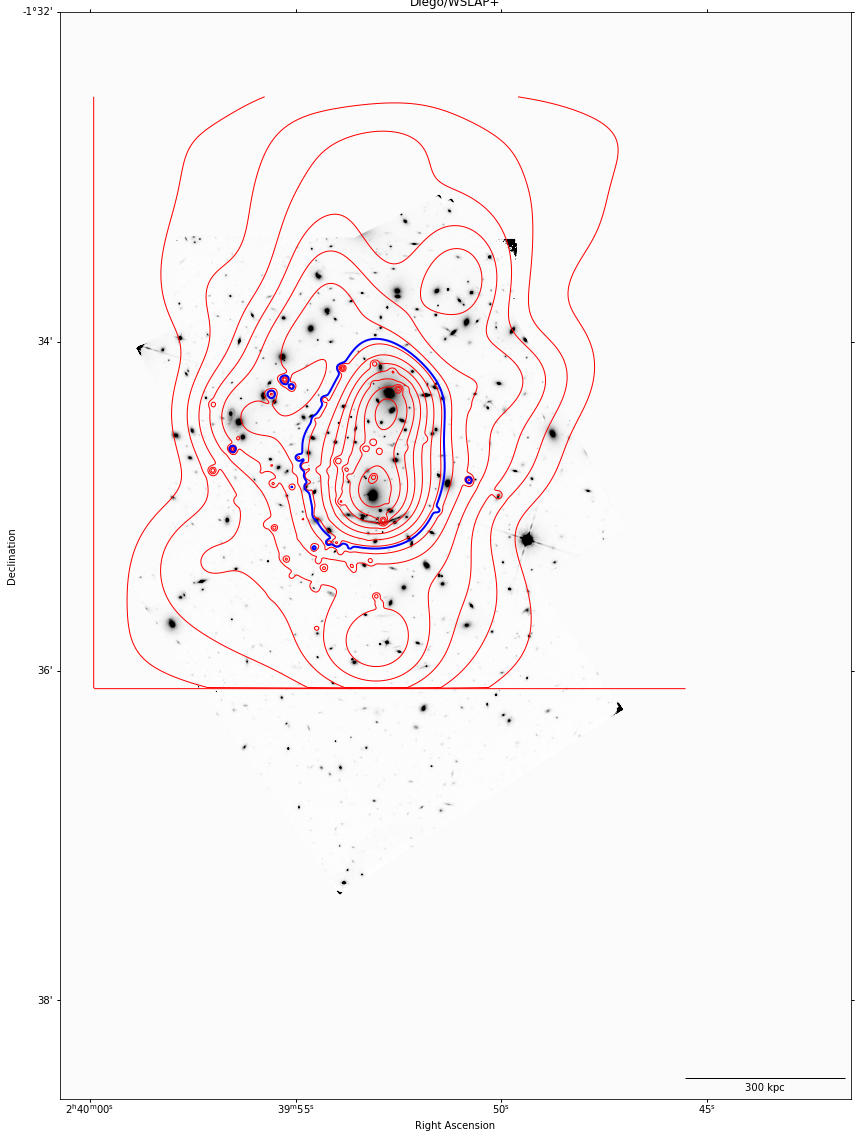

In [148]:
filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_model_abell370_diego_v4.1_kappa.fits')
p='Diego/WSLAP+'
plot(filename1,filename,p,20)


## CATS

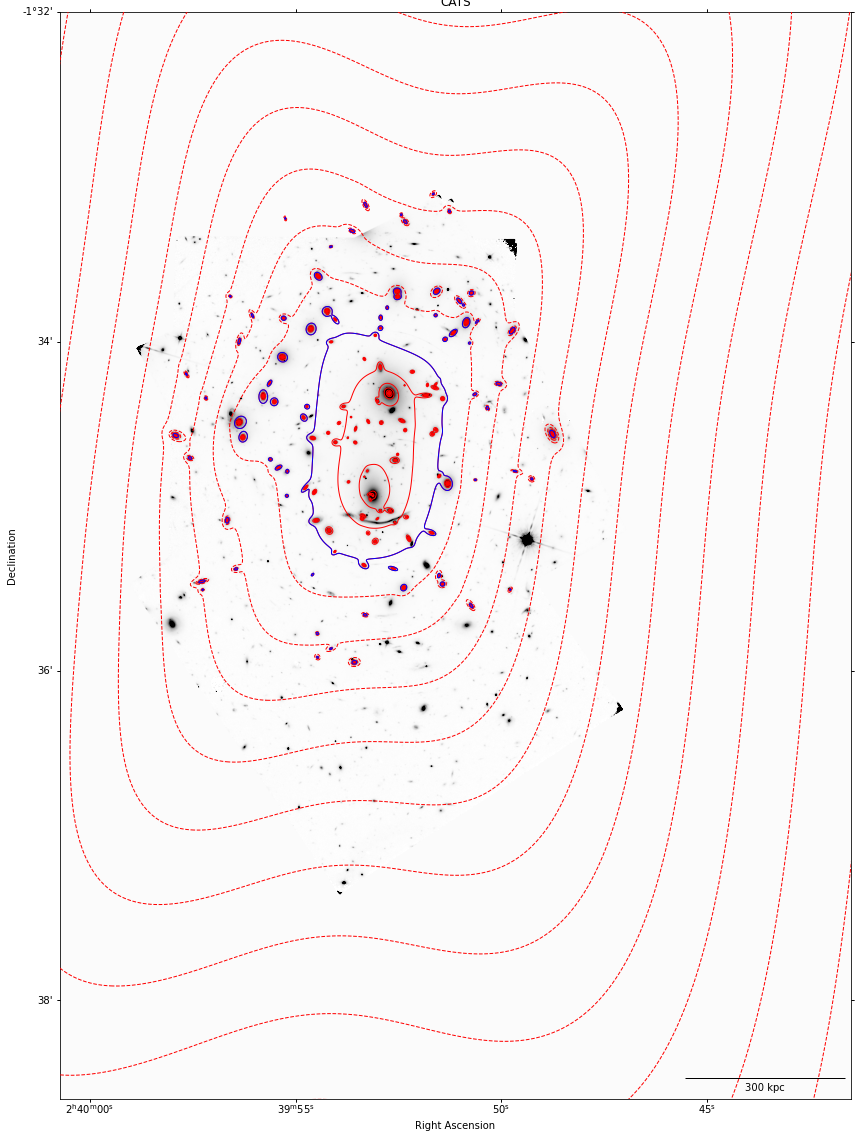

In [150]:
filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_model_abell370_cats_v4_kappa.fits')
p='CATS'
logplot(filename1,filename,p,30) #mass is in log scale


## Kawamata/GLAFIC

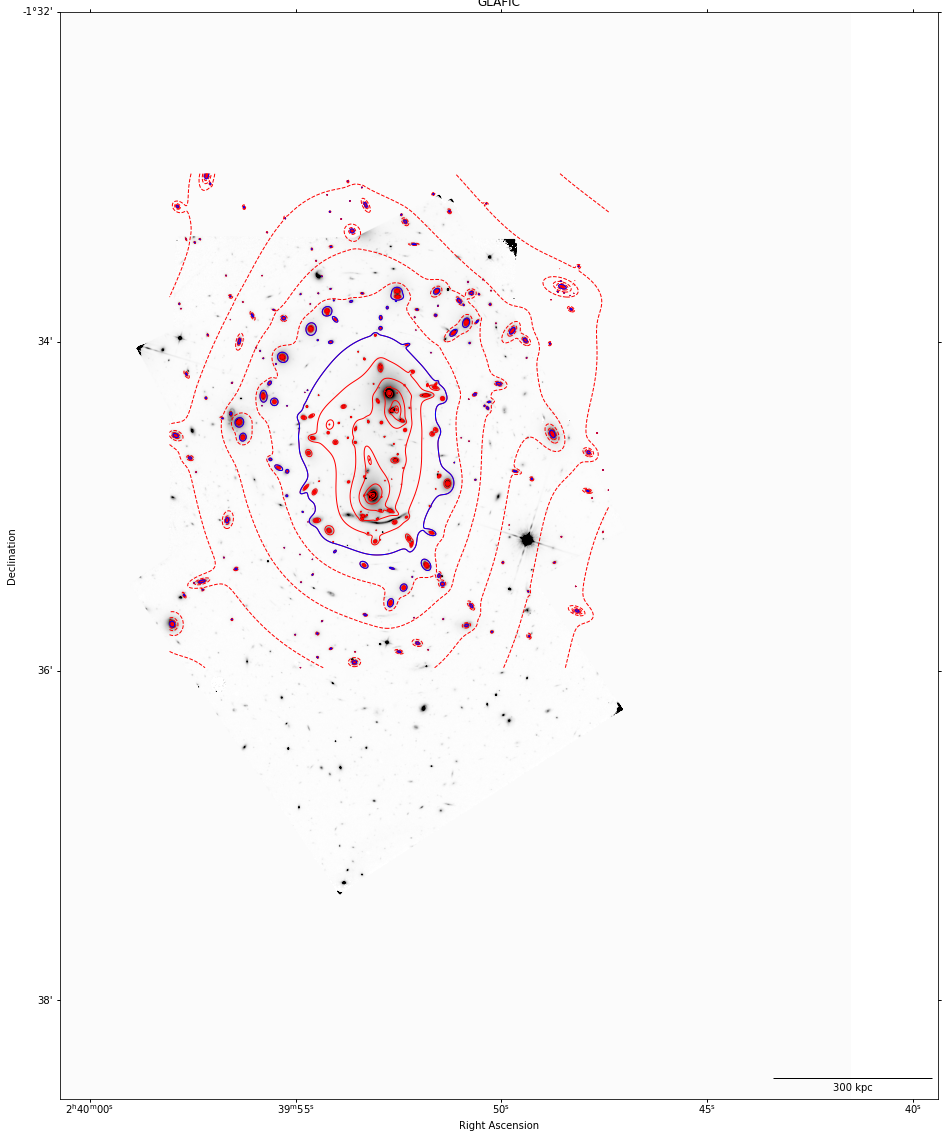

In [147]:
filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_model_abell370_glafic_v4_kappa.fits')
p='GLAFIC'

logplot(filename1,filename,p,30) #mass is in log scale

## Keeton/LENSMODEL

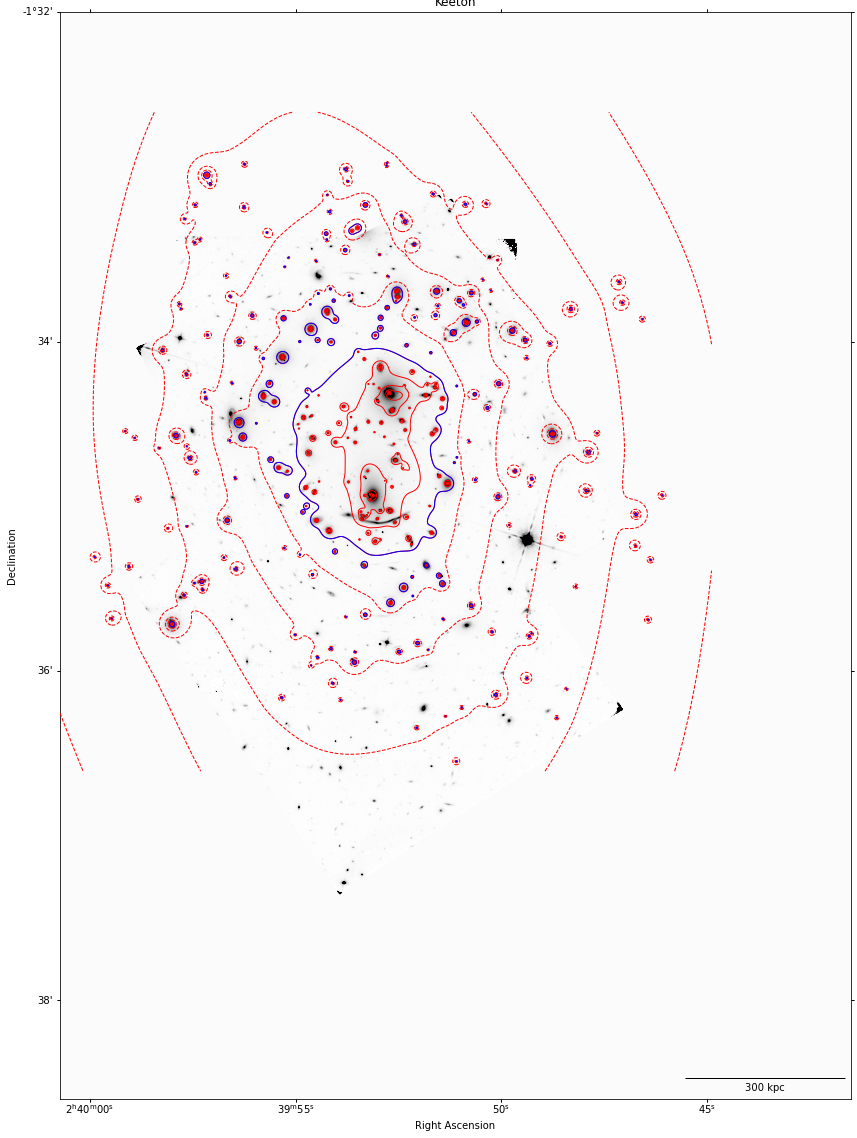

In [149]:
filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_model_abell370_keeton_v4_kappa.fits')
p='Keeton'

logplot(filename1,filename,p,30) #mass is in logscale

## Sharon/LENSTOOL

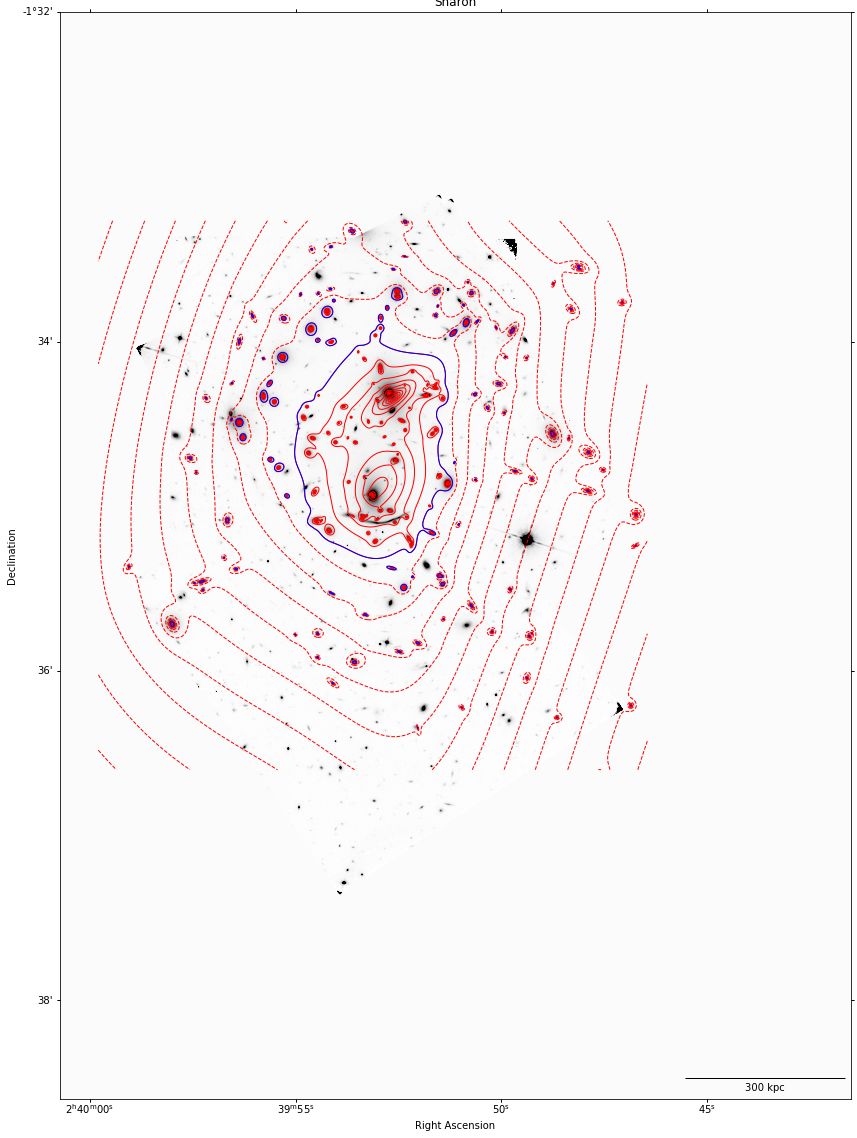

In [151]:
filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_model_abell370_sharon_v4_kappa.fits')
p='Sharon'

logplot(filename1,filename,p,30) #mass is in logscale

## Williams v4.1

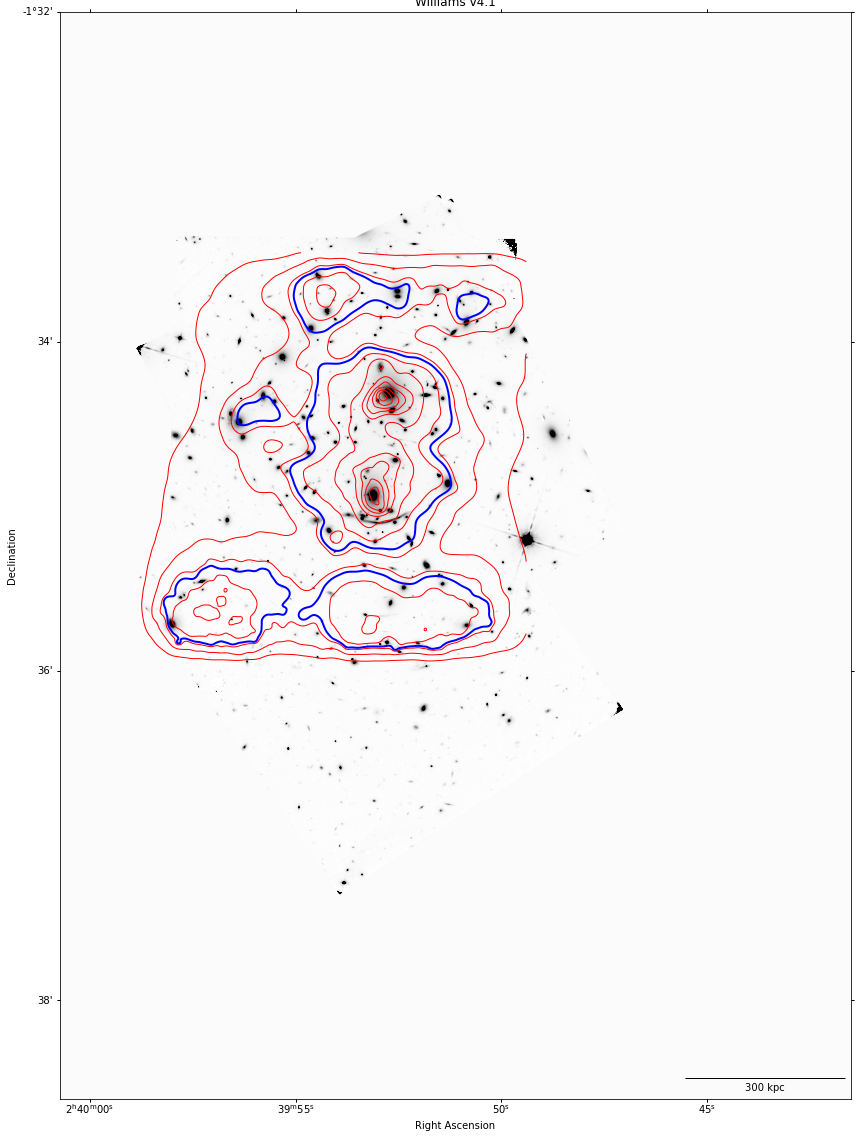

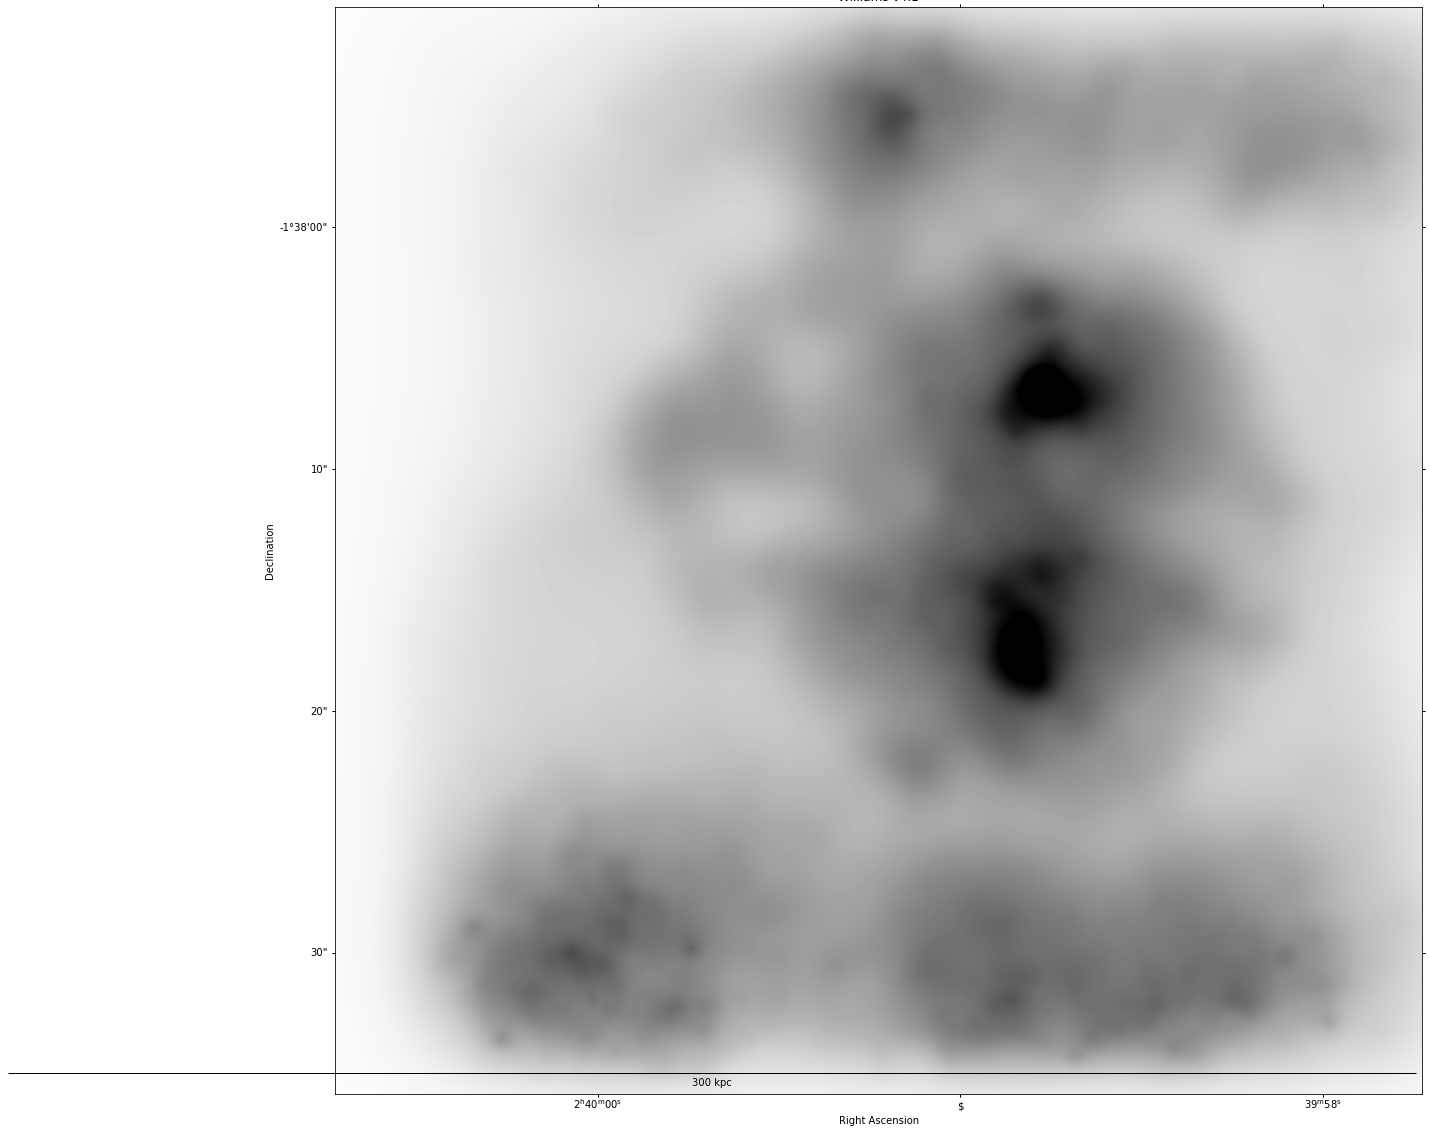

In [196]:
filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_model_abell370_williams_v4.1_kappa (1).fits')
p='Williams v4.1'

plot(filename1,filename,p,10)

denseplot(filename1,filename,p,2.5)

## Williams v4

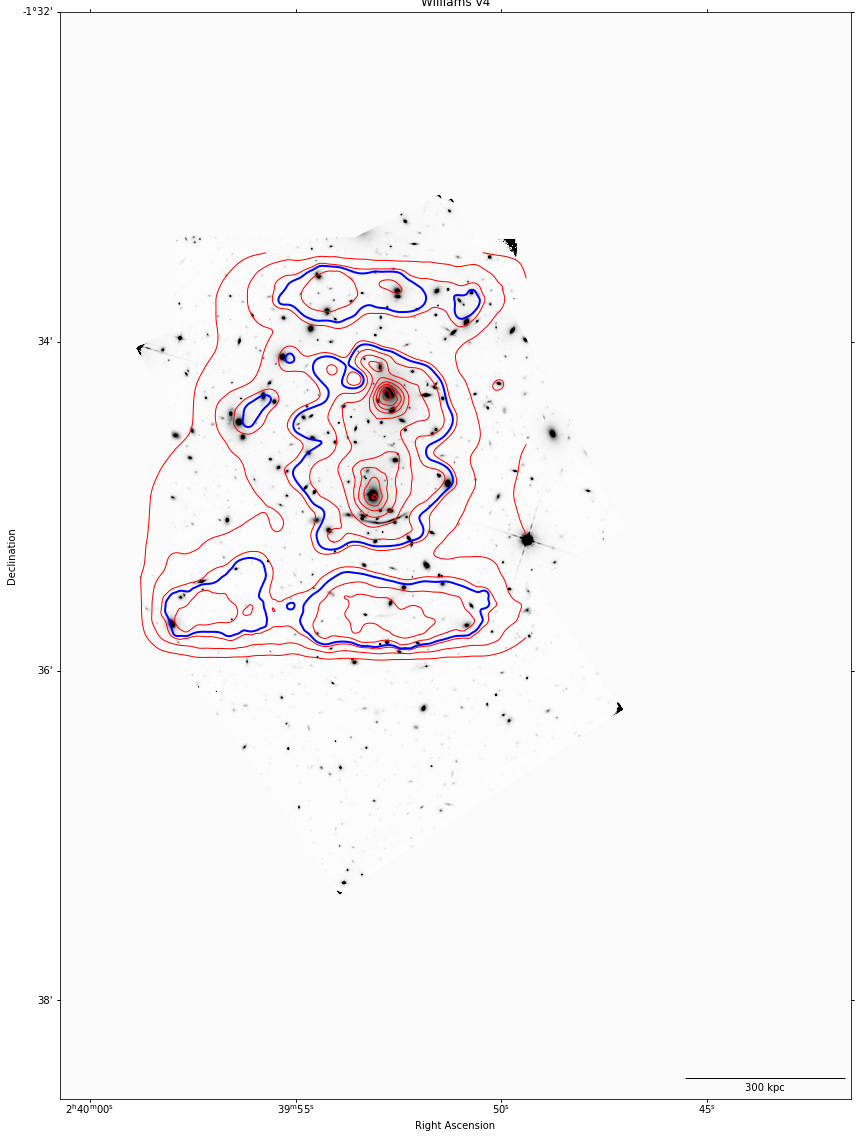

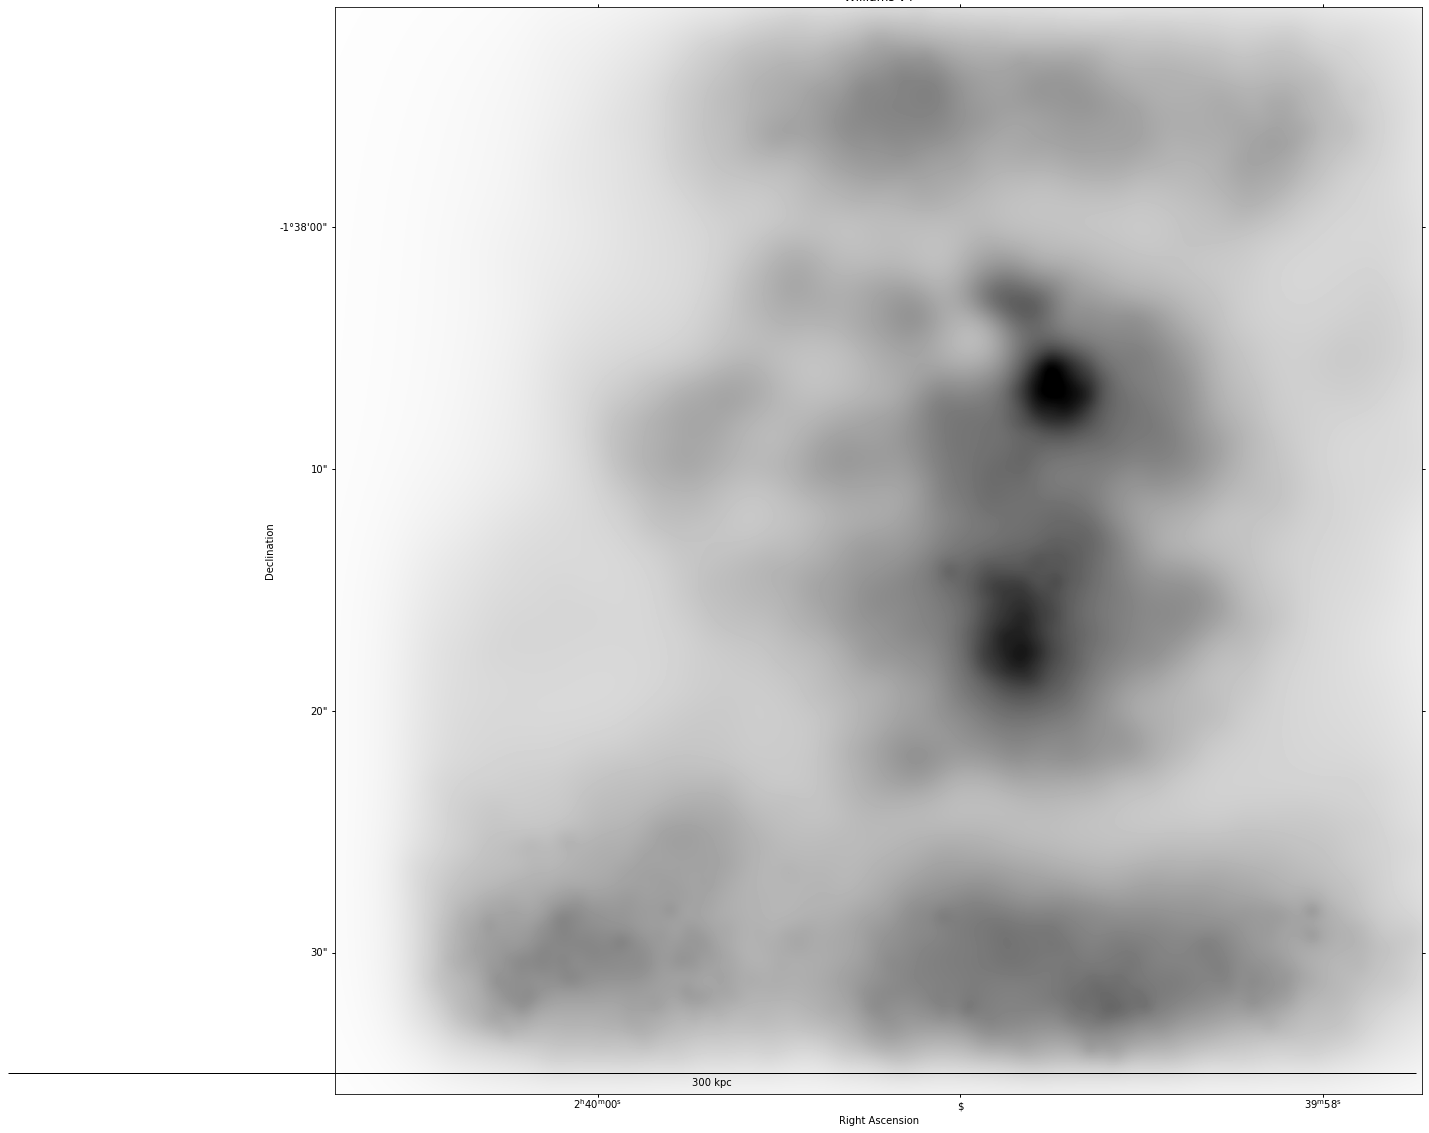

In [195]:
filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_model_abell370_williams_v4_kappa.fits')
p='Williams v4'

plot(filename1,filename,p,10)
denseplot(filename1,filename,p,3)

## Williams v1

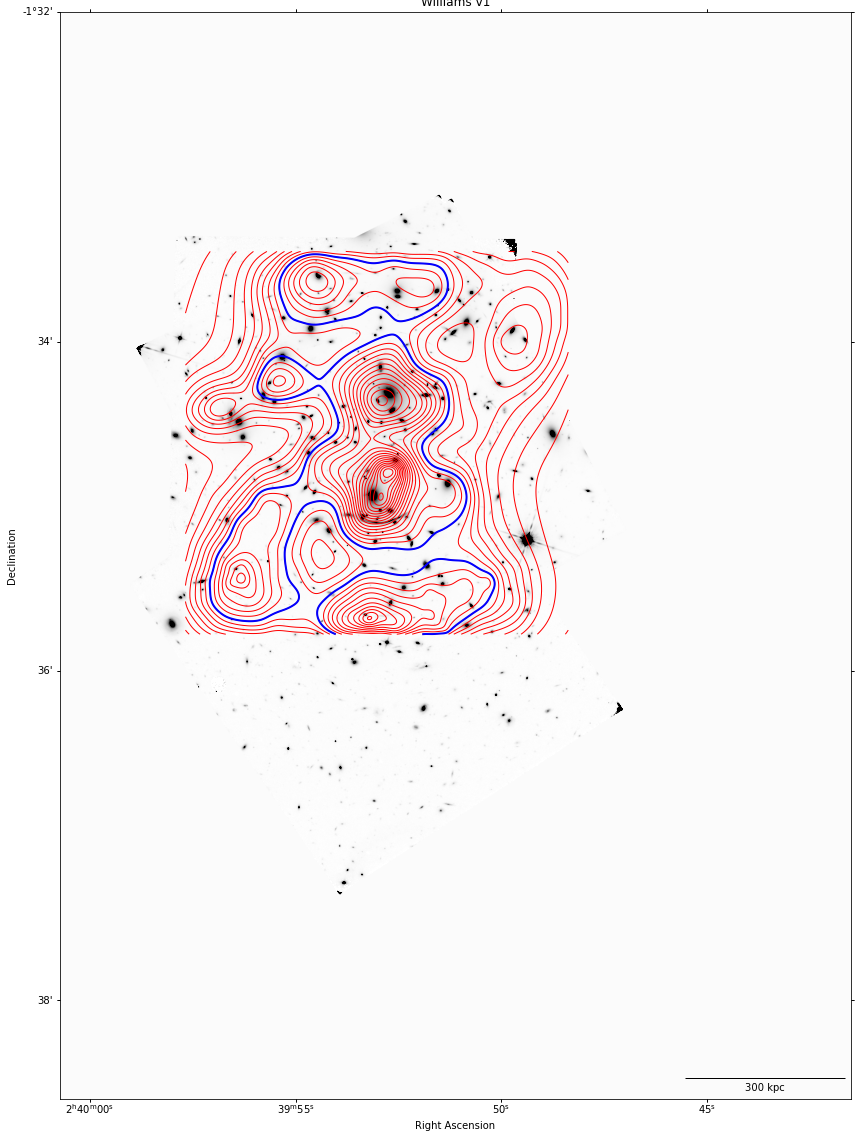

In [153]:
filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_model_abell370_williams_v1_kappa.fits')
p='Williams v1'

plot(filename1,filename,p,30)

## Bradac/SWUnited

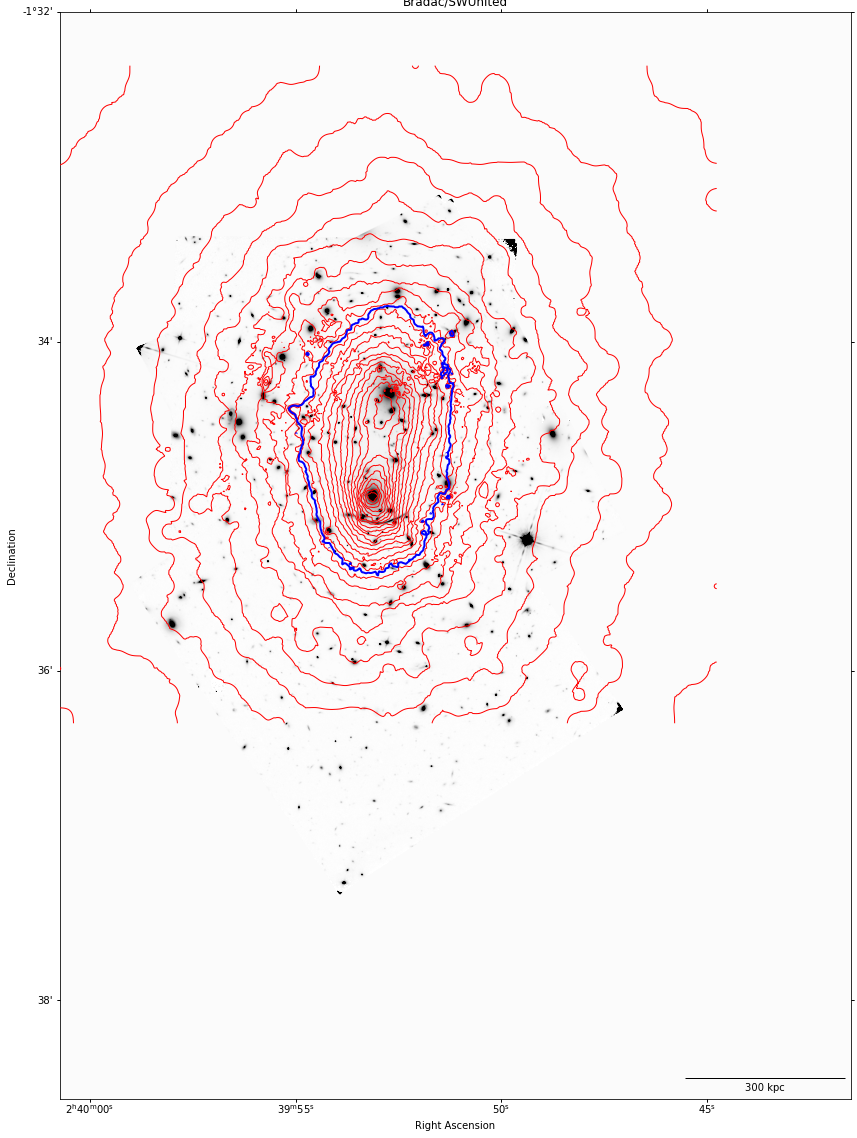

In [154]:
filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_model_abell370_bradac_v4.1_kappa.fits')
p='Bradac/SWUnited'

plot(filename1,filename,p,30)

## Zitin-LTM

<ipython-input-157-8d11865d8481>:101: RuntimeWarning: invalid value encountered in log10
  im=plt.contour(np.log10(hdu1.data), noc, colors='red',transform=ax.get_transform(WCS(hdu1.header)),linewidths=1)
<ipython-input-157-8d11865d8481>:102: RuntimeWarning: invalid value encountered in log10
  plt.contour(np.log10(hdu1.data), [0], colors='blue',transform=ax.get_transform(WCS(hdu1.header)),linewidths=1)


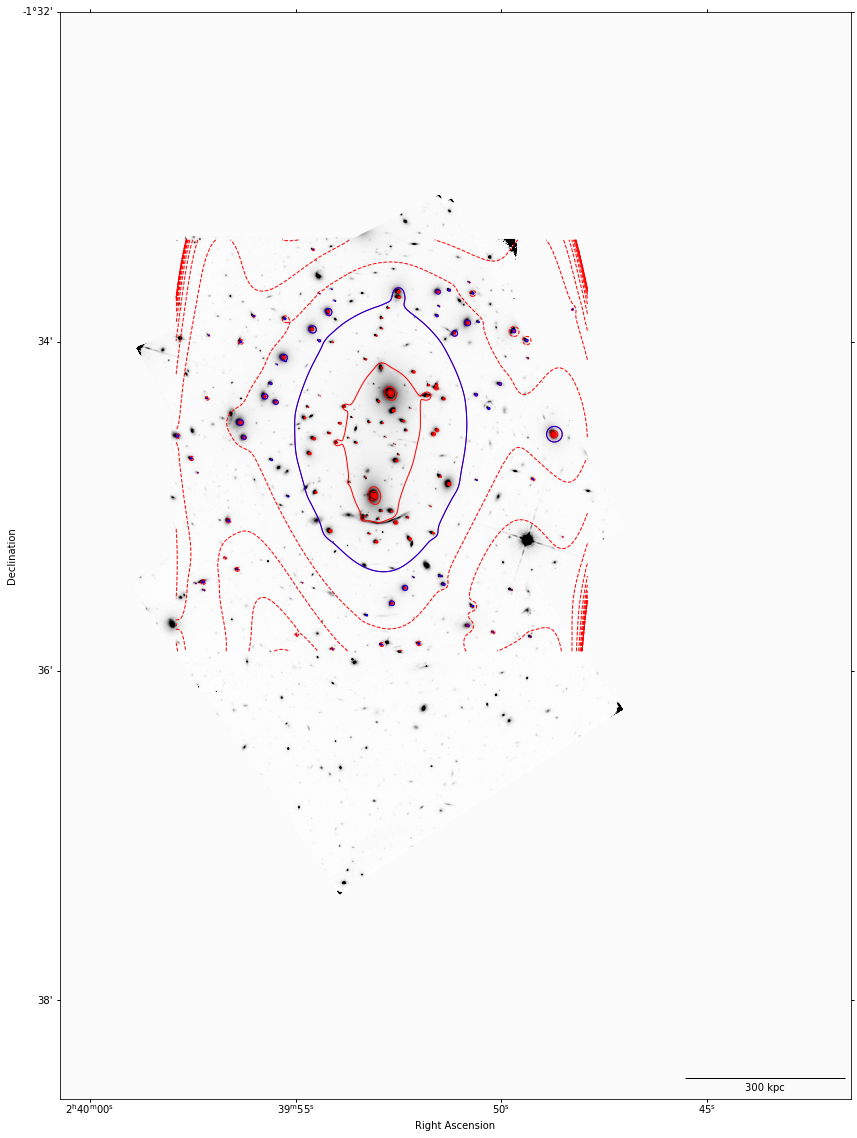

In [165]:
filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_model_abell370_zitrin-ltm_v1_kappa.fits')
p=''

logplot(filename1,filename,p,50)

## Zitrin-NFW

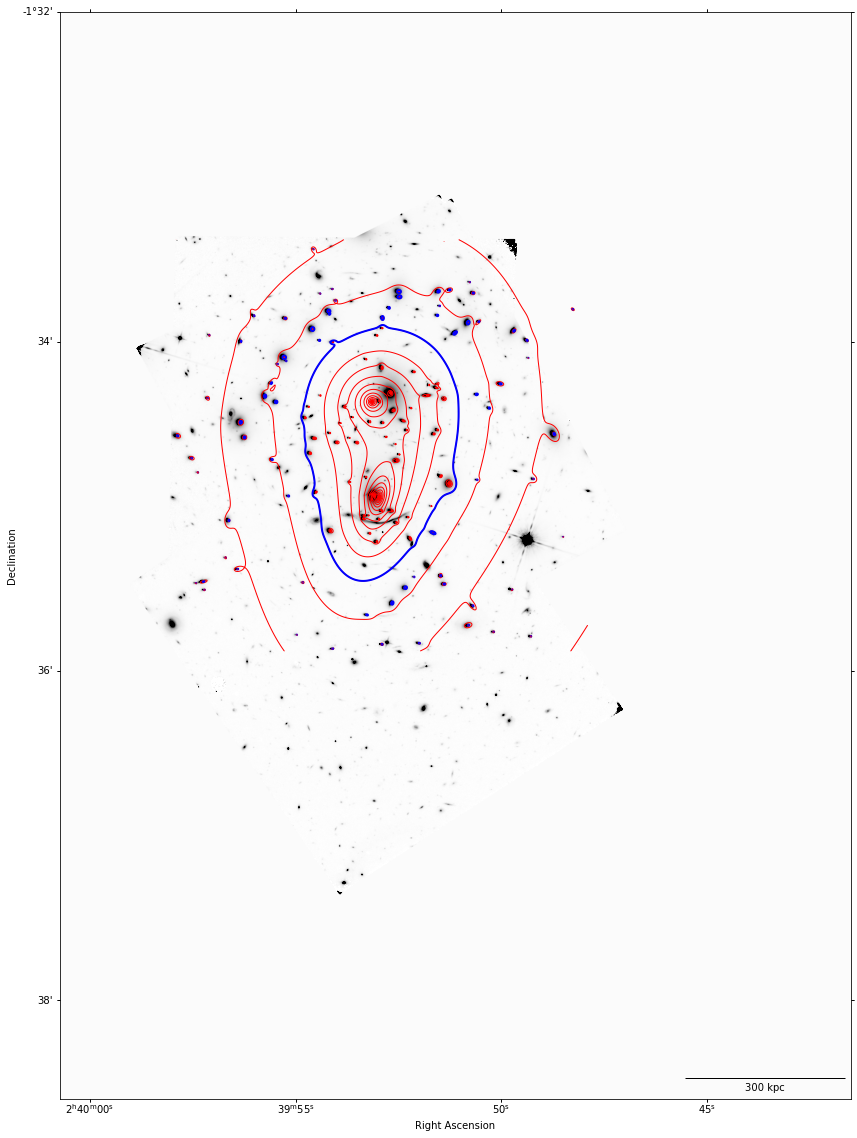

In [160]:
filename1 = get_pkg_data_filename('/Users/agnivaghosh/Downloads/Lensing/fits_a370/hlsp_frontier_model_abell370_zitrin-nfw_v1_kappa.fits')
p=''

plot(filename1,filename,p,30)